# Escola de Dados - Python para inovação cívica
## Módulo 1: Noções básicas de estatística descritiva e pré-processamento

- [Aula 8](#Aula-8:-Introdução-a-estatística)
- [Aula 9](#Aula-9:-Medidas-de-tendência-central-e-dispersão)
- [Aula 10](#Aula-10:-Outliers-e-valores-faltantes)
- [Aula 12](#Aula-12:-Operações-básicas-com-python)
- [Aula 13](#Aula-13:-Métodos-`filter`-e-`sort_values`)
- [Aula 14](#Aula-14:-Operações-com-dados-e-método-`apply`)
- [Aula 15](#Aula-15:-Operações-com-dados-e-método-`groupby`)


### Aula 8: Introdução a estatística

Os dados que usaremos nesse notebook pode ser encontrado em: [TSE. Candidaturas em 2020](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1).

Trabalharemos com os dados referentes as candidaturas nos estados de Amapá e Pará.


In [1]:
import pandas as pd
import glob

In [2]:
dados_ap_pa = ['base_dados/consulta_cand_2020_AP.csv', 'base_dados/consulta_cand_2020_PA.csv']

In [3]:
lista_df = []

for dados_estado in dados_ap_pa:
    df_estado = pd.read_csv(dados_estado, sep=';', encoding='latin_1')
    lista_df.append(df_estado)

In [4]:
df_completo = pd.concat(lista_df, axis=0, ignore_index=True)

É possível criar um dataframe apenas com os dados de candidaturas para as Câmeras de Vereados dos estados.

In [5]:
df_vereadores = df_completo[df_completo['CD_CARGO'] == 13].copy()

In [6]:
df_vereadores.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO',
       'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO',
       'CD_MUNICIPIO_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_IDADE_DATA_POSSE', 'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO',
       'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO',
       'CD_ESTAD

O método `pd.describe` traz um quadro com algumas medidas da estatística descritiva, como as medidas de tendência central, medidas de dispersão e quartis, excluindo os valores NaN (not a number).

In [7]:
df_vereadores.shape

(24583, 71)

In [8]:
df_vereadores.describe()

,ANO_ELEICAO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,SG_UE,CD_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NR_CPF_CANDIDATO,CD_SITUACAO_CANDIDATURA,...,CD_ESTADO_CIVIL,CD_COR_RACA,CD_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,CD_SITUACAO_CANDIDATO_TOT
count,24583.0,24583.0,24583.0,24583.000000,24583.000000,24583.0,2.458300e+04,24583.000000,2.458300e+04,24583.000000,...,24583.000000,24583.000000,24583.000000,24583.000000,24583.000000,24583.0,2.458300e+04,24583.000000,24583.000000,24583.000000
mean,2020.0,2.0,1.0,426.408860,4934.148314,13.0,1.296959e+11,31086.054875,4.780648e+10,11.494773,...,2.224952,2.596022,552.461376,59365.732494,4.288614,-1.0,6.002713e+18,2.055974,2.088679,2.106374
std,0.0,0.0,0.0,2.757078,663.648303,0.0,3.205320e+10,20829.576759,3.104649e+10,2.071706,...,1.837225,0.888529,326.046922,93041.750641,1.283715,0.0,1.704343e+15,1.468889,1.624685,1.618616
min,2020.0,2.0,1.0,426.000000,4006.000000,13.0,3.000063e+10,10000.000000,-4.000000e+00,3.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-1.000000,-1.0,6.000168e+18,-1.000000,-1.000000,-1.000000
25%,2020.0,2.0,1.0,426.000000,4332.000000,13.0,1.400008e+11,15015.000000,1.955834e+10,12.000000,...,1.000000,2.000000,265.000000,15568.960000,4.000000,-1.0,6.001442e+18,2.000000,2.000000,2.000000
50%,2020.0,2.0,1.0,426.000000,4774.000000,13.0,1.400009e+11,22300.000000,5.162824e+10,12.000000,...,1.000000,3.000000,541.000000,24713.500000,5.000000,-1.0,6.002299e+18,2.000000,2.000000,2.000000
75%,2020.0,2.0,1.0,426.000000,5517.000000,13.0,1.400011e+11,45133.000000,7.379923e+10,12.000000,...,3.000000,3.000000,999.000000,53698.780000,5.000000,-1.0,6.003640e+18,2.000000,2.000000,2.000000
max,2020.0,2.0,1.0,445.000000,6173.000000,13.0,1.400013e+11,90999.000000,9.998375e+10,12.000000,...,9.000000,6.000000,999.000000,438043.030000,5.000000,-1.0,6.016571e+18,20.000000,20.000000,20.000000


Para gerar relatórios interativos em HTML a partir de um dataframe do pandas usaremos a biblioteca Pandas Profiling, com ele para cada coluna será apresentado estatístico correspondente ao tipo de dado.

In [2]:
# pip install ydata-profiling

                                              0.0/353.0 kB ? eta -:--:--
     ----------------------------           266.2/353.0 kB 5.4 MB/s eta 0:00:01
     -------------------------------------- 353.0/353.0 kB 5.5 MB/s eta 0:00:00
                                              0.0/42.2 MB ? eta -:--:--
                                              0.6/42.2 MB 12.2 MB/s eta 0:00:04
     -                                        1.2/42.2 MB 12.2 MB/s eta 0:00:04
     -                                        2.0/42.2 MB 13.9 MB/s eta 0:00:03
     --                                       2.6/42.2 MB 15.0 MB/s eta 0:00:03
     ---                                      3.4/42.2 MB 14.5 MB/s eta 0:00:03
     ---                                      4.2/42.2 MB 14.8 MB/s eta 0:00:03
     -----                                    5.3/42.2 MB 16.8 MB/s eta 0:00:03
     -----                                    6.3/42.2 MB 16.8 MB/s eta 0:00:03
     ------                                   6.8/42.2 

In [9]:
pip show ydata-profiling

^C
Note: you may need to restart the kernel to use updated packages.


Name: ydata-profiling
Version: 4.3.1
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/ydataai/ydata-profiling
Author: YData Labs Inc
Author-email: opensource@ydata.ai
License: MIT
Location: c:\Users\gm_bi\Documents\GitHub\Escola_de_Dados\python-inovacao-civica\env\Lib\site-packages
Requires: dacite, htmlmin, imagehash, jinja2, matplotlib, multimethod, numpy, pandas, phik, pydantic, PyYAML, requests, scipy, seaborn, statsmodels, tqdm, typeguard, visions, wordcloud
Required-by: 


In [11]:
import numpy as np
from ydata_profiling import ProfileReport

In [12]:
profile = ProfileReport(df_vereadores, title="Introdução - Pandas Profiling Report")

In [15]:
profile.to_file(output_file="relatorio_eleicoes_vereadores_2020_ap_pa.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 12.82it/s]


## Em AP e PA, houveram quantas candidaturas para a prefeitura?

In [13]:
df_prefeito = df_completo[df_completo['DS_CARGO'] == 'PREFEITO'].copy()
quantidade_prefeitos = df_prefeito.shape[0]
print (f'Os estados de AP e PA tiveram {quantidade_prefeitos} candidaturas para a prefeitura.')

Os estados de AP e PA tiveram 770 candidaturas para a prefeitura.


### Aula 9: medidas de tendência central e dispersão

As medidas de tendência central servem para determinar o valor central de uma distribuição. Vamos explorar mais um pouco nosso dataframe e descobrir qual a moda (valor que mais se repete) da colina 'SG_PARTIDO'

In [14]:
df_vereadores['SG_PARTIDO'].mode()

0    MDB
Name: SG_PARTIDO, dtype: object

A média aritmética da coluna 'NR_IDADE_DATA_POSSE' é:

In [15]:
df_vereadores['NR_IDADE_DATA_POSSE'].mean()

43.164185176145146

Continuando a explorar a idade das pessoas candidatas na data da posse, queremos saber qual é o valor que ocupa a posição central do conjunto de dados, após a ordenação dos valores (mediana).


In [16]:
df_vereadores['NR_IDADE_DATA_POSSE'].median()

43.0

Qual a variância do dado 'NR_IDADE_DATA_POSSE'?

In [17]:
df_vereadores['NR_IDADE_DATA_POSSE'].var()

118.23389400874976

Qual o desvio padrão do dado 'NR_IDADE_DATA_POSSE'?

In [18]:
df_vereadores['NR_IDADE_DATA_POSSE'].std()

10.873541005980975

## Qual a média, moda e mediana do 'VR_DESPESA_MAX_CAMPANHA'?

In [19]:
media_despesa_max = df_completo['VR_DESPESA_MAX_CAMPANHA'].mean()
moda_despesa_max = df_completo['VR_DESPESA_MAX_CAMPANHA'].mode()[0]
mediana_despesa_max = df_completo['VR_DESPESA_MAX_CAMPANHA'].median()

print (f'A média é R${media_despesa_max:.2f}, a moda é R${moda_despesa_max} e a mediana é R${mediana_despesa_max}.')

A média é R$66799.60, a moda é R$12307.75 e a mediana é R$24149.88.


### Aula 10: Outliers e valores faltantes


De acordo com o dicionário de dados do conjunto de dados do TSE, os valores faltantes estão preenchidos com #NULO#, no entanto o Pandas não reconhece essa palavra como um missing. Faremos a substituição da string "#NULO#" pelo valor `None` nas colunas com valores categóricos.

In [20]:
colunas_categoricas = ['NM_TIPO_ELEICAO', 'DS_ELEICAO', 'TP_ABRANGENCIA', 'SG_UF', 'NM_UE', 'DS_CARGO', 
                       'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NM_EMAIL', 
                       'DS_SITUACAO_CANDIDATURA', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO', 'SG_PARTIDO', 
                       'NM_PARTIDO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'DS_NACIONALIDADE', 
                       'SG_UF_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO', 
                       'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA', 
                       'DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'ST_DECLARAR_BENS', 'DS_SITUACAO_CANDIDATO_PLEITO', 
                       'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA'
                      ]


In [21]:
df_vereadores[colunas_categoricas] = df_vereadores.loc[:, colunas_categoricas].replace({'#NULO#': None})

In [22]:
df_vereadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24583 entries, 0 to 26152
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     24583 non-null  object 
 1   HH_GERACAO                     24583 non-null  object 
 2   ANO_ELEICAO                    24583 non-null  int64  
 3   CD_TIPO_ELEICAO                24583 non-null  int64  
 4   NM_TIPO_ELEICAO                24583 non-null  object 
 5   NR_TURNO                       24583 non-null  int64  
 6   CD_ELEICAO                     24583 non-null  int64  
 7   DS_ELEICAO                     24583 non-null  object 
 8   DT_ELEICAO                     24583 non-null  object 
 9   TP_ABRANGENCIA                 24583 non-null  object 
 10  SG_UF                          24583 non-null  object 
 11  SG_UE                          24583 non-null  int64  
 12  NM_UE                          24583 non-null  obje

Geraremos um novo relatório usando o Pandas Profiling para visualizar as mudanças.

In [ ]:
profile = ProfileReport(df_vereadores, title="Limpeza dos dados - Pandas Profiling Report")
profile.to_file(output_file="relatorio_eleicoes_vereadores_2020_ap_pa_limpo.html")

### Aula 12: Operações básicas com dados

Costumamos construir um subdataframe apenas com as colunas que usaremos na nossa análise. Existem várias formas de filtrar as linhas e colunas. Vamos aprender como fazer isso separadamente: 

Filtrar as 26 colunas pertinentes para nosso estudo.

In [24]:
df_vereadores_ap_pa_reduzido = df_vereadores[
    ['ANO_ELEICAO','TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
     'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO','NM_SOCIAL_CANDIDATO', 'NR_PARTIDO',
     'SG_PARTIDO', 'NR_IDADE_DATA_POSSE','CD_GENERO', 'DS_GENERO', 'CD_COR_RACA', 'DS_COR_RACA',
     'VR_DESPESA_MAX_CAMPANHA', 'CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'CD_SITUACAO_CANDIDATURA',
     'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND']
].copy()

In [25]:
df_vereadores_ap_pa_reduzido.shape

(24583, 26)

Agora selecionaremos apenas as pessoas que tem sua candidaturas "apto", "deferido" e "deferido com recurso".

In [26]:
df_vereadores_ap_pa_reduzido_aptas = df_vereadores_ap_pa_reduzido[
    df_vereadores_ap_pa_reduzido['CD_SITUACAO_CANDIDATURA'] == 12
]

In [27]:
df_vereadores_ap_pa_reduzido_aptas_deferidas = df_vereadores_ap_pa_reduzido_aptas[
    (df_vereadores_ap_pa_reduzido_aptas['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO') | 
    (df_vereadores_ap_pa_reduzido_aptas['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO')
]

In [28]:
df_vereadores_ap_pa_reduzido_aptas_deferidas.shape

(23089, 26)

Agora, aprenderemos a filtrar usando a função `pd.loc`:

In [29]:
colunas_desejadas = ['ANO_ELEICAO','TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
     'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO','NM_SOCIAL_CANDIDATO', 'NR_PARTIDO',
     'SG_PARTIDO', 'NR_IDADE_DATA_POSSE','CD_GENERO', 'DS_GENERO', 'CD_COR_RACA', 'DS_COR_RACA',
     'VR_DESPESA_MAX_CAMPANHA', 'CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'CD_SITUACAO_CANDIDATURA',
     'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND']

In [33]:
filtro_linhas = (df_vereadores['CD_SITUACAO_CANDIDATURA'] == 12) & (
    (df_vereadores['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO') | 
    (df_vereadores['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO')
)

In [34]:
df_vereadores_ap_pa_reduzido_aptas_deferidas_2 = df_vereadores.loc[filtro_linhas, colunas_desejadas]

In [35]:
df_vereadores_ap_pa_reduzido_aptas_deferidas_2.shape

(23089, 26)

In [36]:
df_vereadores_ap_pa = df_vereadores_ap_pa_reduzido_aptas_deferidas_2.copy()

## Sua vez, crie um dataframe com apenas os nomes e partidos das pessoas candidatas que se autodeclararam como 'PARDA', 'PRETA' e 'INDÍGENA'

In [43]:
filtro_raca = (
    (df_vereadores['DS_COR_RACA'] == 'PARDA') |
    (df_vereadores['DS_COR_RACA'] == 'PRETA') |
    (df_vereadores['DS_COR_RACA'] == 'INDÍGENA')
)
colunas_nome_partidos = ['NM_CANDIDATO','NM_PARTIDO']
df_vereadores_nome_partido_filtro_raca = df_vereadores.loc[filtro_raca, colunas_nome_partidos].copy()
df_vereadores_nome_partido_filtro_raca

,NM_CANDIDATO,NM_PARTIDO
0,RAIMUNDO MESQUITA FERREIRA DOS SANTOS,PROGRESSISTAS
1,MAURICIO DEL CASTILLO RAIOL,PARTIDO DOS TRABALHADORES
2,KENNAS DE OLIVEIRA DOS SANTOS,PARTIDO SOCIAL DEMOCRÁTICO
4,MAURÍCIO DE OLIVEIRA SUCUPIRA,PARTIDO DEMOCRÁTICO TRABALHISTA
5,ADRIANO DOS SANTOS SILVA,PARTIDO SOCIAL LIBERAL
...,...,...
26147,RENILDO FERREIRA,PARTIDO TRABALHISTA BRASILEIRO
26148,MATEUS PEREIRA XAVIER,PARTIDO DEMOCRÁTICO TRABALHISTA
26149,ADRIANA DA SILVA CUNHA,MOVIMENTO DEMOCRÁTICO BRASILEIRO
26150,TAMARA FERREIRA DE ALMEIDA,PARTIDO SOCIAL CRISTÃO


### Aula 13: Métodos `filter` e `sort_values`

Vamos filtrar todas as colunas que possuam as letras "DIDATO" no seu título:

In [60]:
df_vereadores_ap_pa_nomes = df_vereadores_ap_pa.filter(like='CANDIDATO', axis=1)
df_vereadores_ap_pa_nomes.sample(5)

,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO
18850,20123,DANIELY DOS SANTOS CARVALHO,DANIELY LOIRA DA GRUDE,None
14214,40666,SALOMÃO DOS SANTOS CRISTO,PROFESSOR SALOMÃO CRISTO,None
19594,36866,CLODOVIS RODRIGUES CONCEICAO,CLODOVIS RODRIGUES,None
6424,12111,PAULO SERGIO RODRIGUES DA SILVA,PALITO,None
25338,25123,NELSON LISBOA DA SILVA,NELSON LISBOA,None


Para ordenar as linhas a partir das colunas 'NM_SOCIAL_CANDIDATO' e 'NM_CANDIDATO, usamos o método df.sort_values:

In [61]:
df_vereadores_ap_pa_nomes.sort_values(by=['NM_SOCIAL_CANDIDATO', 'NM_CANDIDATO'], 
                                      ascending=True, 
                                      na_position='last', 
                                      ignore_index=False
).head(10)

,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO
19035,45245,DJENANNY PEREIRA,DJENANNY,DJENANNY PEREIRA
3693,45123,HAGATA MATOS DA SILVA,HAGATA SILVA,HAGATA MATOS DA SILVA
22143,45888,MARIA EDUARDA SANTOS PINHEIRO,DUDA NEREIDY,MARIA EDUARDA SANTOS PINHEIRO
18922,15555,PAULA BULCÃO DE ARAUJO,PAULINHA DA SAÚDE,PAULA BULCÃO DE ARAUJO
10279,40040,PRISCILLA SILVA BRITO,PRISCILLA,PRISCILLA SILVA BRITO
25318,90123,RAYSSA RAYANA ALMEIDA RIBEIRO,RAYSSA RAYANA,RAYSSA RAYANA ALMEIDA RIBEIRO
12593,40555,SHAYLLA RODRIGUES DOS SANTOS,SHAYLLA RODRIGUES MIMOSA,SHAYLLA RODRIGUES DOS SANTOS
7517,14001,ARMANDO DILSON SERRÃO GEMAQUE,SUZZY CABELEIREIRA,SUZZY KAMEG SERRÃO GEMAQUE
19481,12369,ABDIEL BALIEIRO BARBOSA,ABDIEL BARBOSA,None
24316,13555,ABDIEL FRANCISCO DE LIMA,BIBIU LIMA,None


## Selecione apenas as colunas cujo o título possua "DS" e organize em ordem descrescente. Qual o gênero das candidaturas das 3 primeiras linhas?

In [76]:
df_vereadores_ap_pa.filter(like='DS', axis=1).sort_values(
    by=[],
    ascending=False
)['DS_GENERO'].head(3)

0    MASCULINO
1    MASCULINO
2    MASCULINO
Name: DS_GENERO, dtype: object

### Aula 14: Operações com dados e método `apply`

Podemos criar uma nova coluna a partir de operações sobre outras colunas. No exemplo abaixo vamos descobrir o gasto médio diário declarado por cada candidatura.

In [77]:
total_dias_campanha = 45
df_vereadores_ap_pa['GASTO_DIARIO'] = df_vereadores_ap_pa['VR_DESPESA_MAX_CAMPANHA'] / total_dias_campanha

In [113]:
df_vereadores_ap_pa[['NM_CANDIDATO','SG_PARTIDO','GASTO_DIARIO']].sort_values(
    by=['GASTO_DIARIO'],
    ascending=False
).head(985)

,NM_CANDIDATO,SG_PARTIDO,GASTO_DIARIO
6972,ROBSON ALVES DA SILVA,PSL,9734.289556
3295,SUSANY VIEIRA DUARTE,PDT,9734.289556
20457,MAISA SALES GAMA TOBIAS,PROS,9734.289556
9674,DAVID MOYSES NAHON,PL,9734.289556
23002,MANOEL ROLANDO SANTOS BRAZÃO,PATRIOTA,9734.289556
...,...,...,...
22281,EDI SANTOS DE SOUZA,PT,9734.289556
6936,JERENILSON ARAUJO DA SILVA,REPUBLICANOS,5303.558000
20643,ARMANDO DALCY PEREIRA,PDT,5303.558000
5311,MARIA DO PERPETUO SOCORRO LIMA SOUSA,PSDB,5303.558000


Explorando mais um pouco esses dados, trabalharemos apenas com os dados das candidaturas de Pernambuco e classificaremos os gastos médios diários de acordo com os conceitos de quartil e valores discrepantes que vimos nos vídeos sobre estatística:

In [114]:
df_vereadores_pa = df_vereadores_ap_pa[df_vereadores_ap_pa['SG_UF'] == 'PA'].copy()

In [115]:
primeiro_quartil = df_vereadores_pa['GASTO_DIARIO'].quantile(0.25)
terceiro_quartil = df_vereadores_pa['GASTO_DIARIO'].quantile(0.75)

In [116]:
intervalo_interquartil = terceiro_quartil - primeiro_quartil

In [117]:
limite_inferior = primeiro_quartil - (intervalo_interquartil * 1.5)
limite_superior = terceiro_quartil + (intervalo_interquartil * 1.5)

In [118]:
def classificacao_gasto(row):
    if row < limite_inferior:
        return 'muito abaixo da média'
    elif row >= limite_inferior and row < primeiro_quartil:
        return 'abaixo da média'
    elif row >= primeiro_quartil and row <= terceiro_quartil:
        return 'na média'
    elif row > terceiro_quartil and row <= limite_superior:
        return 'acima da média'
    else:
        return 'muito acima da média'

In [119]:
df_vereadores_pa['CLASSIFICACAO_GASTO_DIARIO'] = df_vereadores_pa['GASTO_DIARIO'].apply(classificacao_gasto)

In [124]:
df_vereadores_pa[['NM_CANDIDATO','SG_PARTIDO','GASTO_DIARIO','CLASSIFICACAO_GASTO_DIARIO']].sample(10)

,NM_CANDIDATO,SG_PARTIDO,GASTO_DIARIO,CLASSIFICACAO_GASTO_DIARIO
12014,ELIANE SANTOS SOUZA,PDT,273.505556,abaixo da média
18032,NILSON MARTINS SANTA BRIGIDA,PL,771.768667,na média
11123,DIONEI CARDOSO PEREIRA,PSC,727.564222,na média
3518,YACTA MARIA REBELO VIANA,PSB,646.656444,na média
23056,VALDEMI PEREIRA DA SILVA,PSC,273.505556,abaixo da média
6717,JOSUÉ DA SILVA OLIVEIRA,PL,365.615333,na média
11392,ELISANDRA SANTA ROSA DE OLIVEIRA SILVA,PDT,1193.306222,acima da média
17173,RAPHAEL SILVA BRITO,PSC,273.505556,abaixo da média
25750,FRANCISCO DAS CHAGAS DE SOUZA,MDB,385.704222,na média
5320,VALDILENE DA SERRA SILVA,PSC,273.505556,abaixo da média


Para facilitar a visualização faremos um gráfico de barras usando a biblioteca matplotlib:

In [125]:
from matplotlib import pyplot as plt

In [126]:
# guarda na variável "classificacao" uma lista com os rótulos usados para classificar os gastos
classificacao = df_vereadores_pa['CLASSIFICACAO_GASTO_DIARIO'].unique().tolist()

In [127]:
#guarda na variável "total_por_classificacao" uma lista a quantidade de ocorrência de cada rótulo
total_por_classificacao = df_vereadores_pa['CLASSIFICACAO_GASTO_DIARIO'].value_counts().to_list()

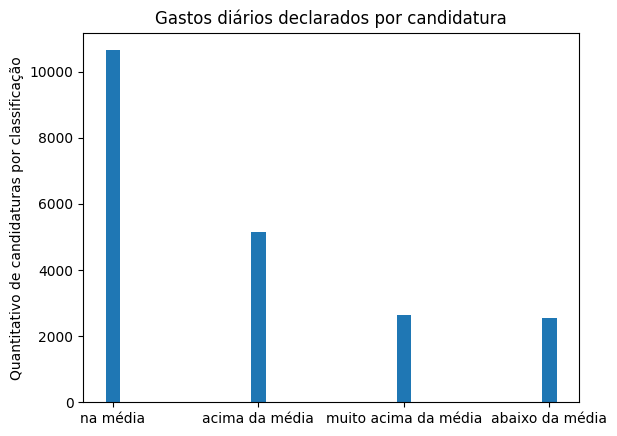

In [141]:
plt.bar(classificacao, total_por_classificacao, [.1, .1, .1, .1])
plt.title('Gastos diários declarados por candidatura')
plt.ylabel('Quantitativo de candidaturas por classificação')

plt.show()

### Aula 15: Operações com dados e método `groupby`

Usando o método groupby podemos agrupar dados segundo informações de uma coluna e fazer operações com o agrupamento.

As perguntas que queremos responder são: quantas mulheres são candidatas? Qual a distribuição de pessoas por grupo racial? Quantidade de mulheres por grupo racial? E qual partido tem mais mulheres em cada grupo racial?


In [142]:
colunas_desejadas = ['SG_PARTIDO', 'DS_GENERO', 'DS_COR_RACA']
filtro = df_vereadores_ap_pa['SG_UF'] == 'AP'

In [143]:
df_vereadores_ap_sexo_raca = df_vereadores_ap_pa.loc[filtro, colunas_desejadas]

In [144]:
df_vereadores_ap_sexo_raca.head()

,SG_PARTIDO,DS_GENERO,DS_COR_RACA
0,PP,MASCULINO,PRETA
1,PT,MASCULINO,PARDA
2,PSD,MASCULINO,PRETA
4,PDT,MASCULINO,PARDA
5,PSL,MASCULINO,PARDA


Agrupando por gênero, quantas candidaturas temos em cada um?

In [145]:
df_vereadores_ap_sexo_raca.groupby(['DS_GENERO']).count()

,SG_PARTIDO,DS_COR_RACA
DS_GENERO,,
FEMININO,765,765
MASCULINO,1349,1349


E por raça?

In [146]:
df_vereadores_ap_sexo_raca.groupby(['DS_COR_RACA']).count()

,SG_PARTIDO,DS_GENERO
DS_COR_RACA,,
AMARELA,3,3
BRANCA,300,300
INDÍGENA,22,22
NÃO INFORMADO,4,4
PARDA,1544,1544
PRETA,241,241


Da candidaturas do gênero feminino, quantas temos em cada grupo racial?

In [148]:
df_vereadores_ap_sexo_raca[df_vereadores_ap_sexo_raca['DS_GENERO'] == 'FEMININO'].groupby(
    ['DS_GENERO', 'DS_COR_RACA']).count()

SG_PARTIDO
DS_GENERO DS_COR_RACA              
FEMININO  AMARELA                 2
          BRANCA                103
          INDÍGENA                5
          NÃO INFORMADO           1
          PARDA                 575
          PRETA                  79

Entre as candidaturas do gênero feminino, quais os partidos com maior número de representação em cada grupo racial?

In [149]:
df_vereadores_ap_sexo_raca[df_vereadores_ap_sexo_raca['DS_GENERO'] == 'FEMININO'].groupby(
    ['DS_GENERO', 'DS_COR_RACA']).max()

SG_PARTIDO
DS_GENERO DS_COR_RACA                 
FEMININO  AMARELA                  PTB
          BRANCA         SOLIDARIEDADE
          INDÍGENA        REPUBLICANOS
          NÃO INFORMADO            PDT
          PARDA          SOLIDARIEDADE
          PRETA           REPUBLICANOS

## Agora é a sua vez, entre as candidaturas do sexo masculino, quais os partidos com o menor número de representantes em cada grupo racial?

In [166]:
df_vereadores_ap_sexo_raca[df_vereadores_ap_sexo_raca['DS_GENERO'] == 'MASCULINO'].groupby(
    ['DS_GENERO', 'DS_COR_RACA']
).min()

SG_PARTIDO
DS_GENERO DS_COR_RACA             
MASCULINO AMARELA             PRTB
          BRANCA            AVANTE
          INDÍGENA             DEM
          NÃO INFORMADO        MDB
          PARDA             AVANTE
          PRETA          CIDADANIA

In [156]:
df_vereadores_ap_sexo_raca[df_vereadores_ap_sexo_raca['DS_GENERO'] == 'MASCULINO'].groupby(
    ['DS_COR_RACA','SG_PARTIDO']
).count()

DS_GENERO
DS_COR_RACA SG_PARTIDO              
AMARELA     PRTB                   1
BRANCA      AVANTE                 4
            CIDADANIA              6
            DEM                   13
            MDB                   18
...                              ...
PRETA       PT                     5
            PV                     1
            REDE                  10
            REPUBLICANOS          13
            SOLIDARIEDADE          3

[84 rows x 1 columns]